## Reference:

The setup of the metric, the Christoffel symbols, the Riemann, and Ricci tensors are duplicated from 
https://github.com/wojciechczaja/GraviPy/blob/master/docs/GraviPy-tutorial.ipynb

In [1]:
import sympy as sp

from sympy import symbols, diag, sin, cos

from sympy import init_printing
init_printing()

from IPython.display import display, Math

from gravipy.tensorial import Coordinates, MetricTensor,\
Christoffel, Riemann, Ricci, Tensor, variations, All

In [2]:
# define symbols
t, x, y, z, H = symbols('t, x, y, z, H',real=True)

#### The deSitter metric

In [3]:
## the Coordinates class
x = Coordinates('\chi', [t, x, y, z])

## define a matrix equal to the metric tensor
a = sp.exp(H*t)
Metric = diag(-1,a,a,a) 

## create the metric 
g = MetricTensor('g', x, Metric)

## create the Christoffel symbols
Ga = Christoffel('Ga', g)

## The Riemann tensor
Rm = Riemann('Rm', g)

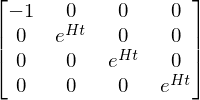

In [4]:
## Show the metric
g(All,All)

In [5]:
## divergence of the Riemann tensor
DRm = lambda i, k, l:\
(\
 ## i,j,k,l are the Riemann tensor indices 
 ## they run from 1 to 4
 ## Indices refer to space-time and not Lorentz frame
 ## m is the component of the covariant derivative
 ## -m and -j means the inverse metric g^{mj} is used not g_{mj}
 sum(Rm.covariantD(i, j, k, l, m)*g(-m,-j)\
      for m, j in list(variations(range(1,5),2,True))\
 )\
).simplify()

In [6]:
## display the left hand side of LGT field equation
for i, k, l in list(variations(range(1, 5), 3, True)):
    val = (DRm(i,k,l)).simplify()
    display(Math(r'\nabla^{\nu}R_{%d\nu%d%d}:'\
                 %(i,k,l)),val)
    print("--")
    


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


<IPython.core.display.Math object>

--


In [7]:
## make sure that all of the components of the
## divergence of the Riemann tensor are zero
not any([(DRm(i,k,l)).simplify()\
         for i, k, l in list(variations(range(1, 5), 3, True))])

True